# March Madness Monte Carlo

In [93]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import math
import random
from tqdm import tqdm
import time

import matplotlib.pylab as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})



from common.Team import Team
from common.Tournament import Tournament

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
tmn = Tournament()
tmn.set_teams_from_csv("teams_64_kenpom_adjEM.csv")

teams = pd.read_csv("teams_64_kenpom_adjEM.csv")

In [103]:
# Simulation

winner_list = []

num_sim = 1000 * 100
print(f"Running Monte Carlo Simulations: {num_sim}")
time.sleep(0.3)

for i in tqdm(range(num_sim)):
    tmn.reset()
    tmn.play_all_games()
    winner = tmn.get_winner("R06", "G01")
    winner_list.append(winner.name())
    
# Count wins
winners = pd.DataFrame(pd.Series(winner_list).value_counts()).reset_index()
winners.columns = ['Name', 'Wins']
winners['Win%'] = round(winners['Wins'] / num_sims * 100, 3)

# Merge with teams
m = teams.merge(winners, on = 'Name')
print(m.sort_values('Wins', ascending=False).head())

Running Monte Carlo Simulations: 100000


100%|█████████████████████████████████████████████████████████| 100000/100000 [02:14<00:00, 745.14it/s]

   Ranking  Seed      Name  Weight  Wins   Win%
0        1     1   Gonzaga   37.94  6053  6.053
2        3    33  Illinois   32.00  4384  4.384
1        2    17  Michigan   32.12  4138  4.138
3        4    49    Baylor   30.78  3976  3.976
5        6    18   Houston   29.13  3117  3.117


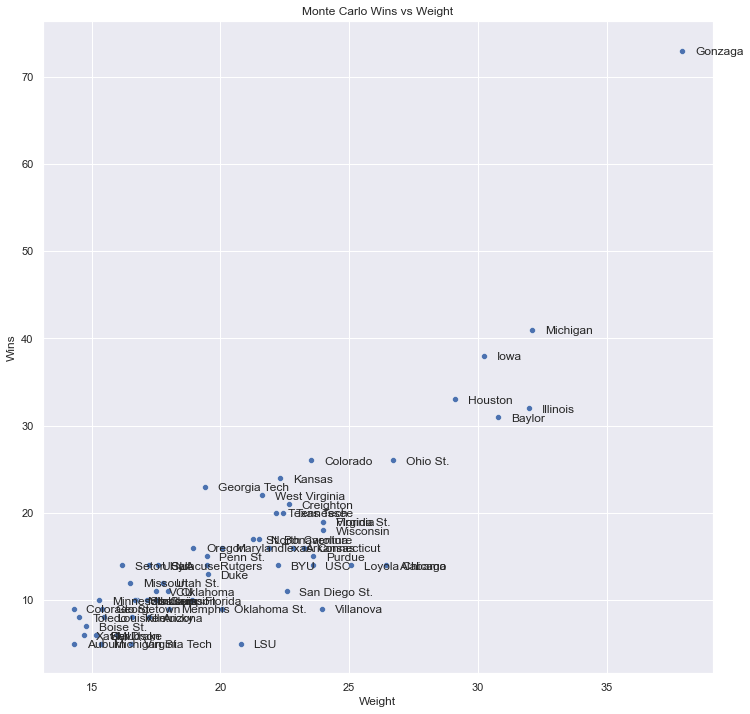

In [99]:
# Plotting
sns.scatterplot(data = m, x='Weight', y = 'Wins')
ax = plt.gca()
ax.set_title("Monte Carlo Wins vs Weight")
for index, row in m.iterrows():
    plt.text(row['Weight']+0.5, row['Wins']-0.5, row['Name'])

<AxesSubplot:xlabel='Wins', ylabel='Name'>

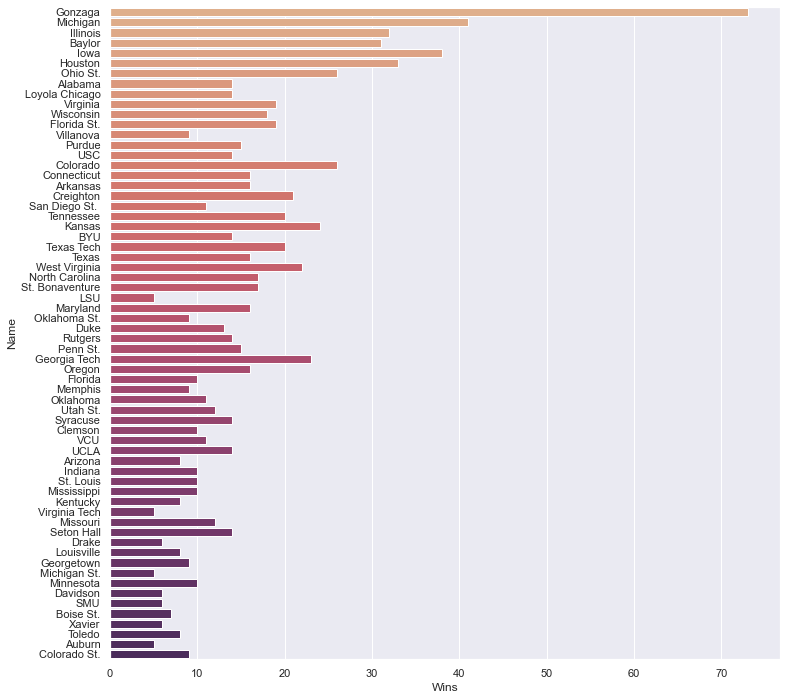

In [100]:
sns.barplot(data = m, x = 'Wins', y = 'Name', orient = 'h', palette = 'flare')

In [101]:
m

,Ranking,Seed,Name,Weight,Wins,Win%
0,1,1,Gonzaga,37.94,73,7.3
1,2,17,Michigan,32.12,41,4.1
2,3,33,Illinois,32.00,32,3.2
3,4,49,Baylor,30.78,31,3.1
4,5,2,Iowa,30.24,38,3.8
...,...,...,...,...,...,...
59,60,63,Boise St.,14.78,7,0.7
60,61,16,Xavier,14.68,6,0.6
61,62,32,Toledo,14.52,8,0.8
62,63,48,Auburn,14.31,5,0.5
